3:
- Box plots are best for comparisons, since they take up very little space, while still giving good data ranges. They are also good for quickly understanding the median and percentiles. On the other hand, they lack a lot of detail about counts of values.
- Histograms are best for detailed information, since they show specific values, and can have more or less bins depending on the precision needed. However, it's harder to compare histograms side by side, and they can be hard to read, or overly simplified depending on the number of bins.
- Kernel Density estimations are very simple and good at looking over general trends in the data, but they can also be misleading, since they aren't actually a direct representation of the data. They also aren't precise either with counts or other information like percentiles.

I like box plots the most. I feel that some of the most interesting conclusions come from comparing data side by side, and box plots are the best for that due to their compact design. Box plots also are overall elegant, and though they lack in some precision, they can still give a very good idea of trends and values if looked at thouroughly. Histograms and Kernel density estimations can both be good, but they aren't nearly as reliable since they can both be made to be misleading, and they also aren't nearly as straightforward and readable as a box plot.

4:
1. Figures B and D though D would have less variance and higher mean. Also Figures A and C.
2. All figures have simmilar means, so any with a low variance (B or D) paired with any with a high variance (A or C)
3. All means are simmilar so none
4. Same as 3, there are none

5:

Right skew has a higher mean than median because outliers affect mean much more. If all values in a graph were close to 1, but the top 10 percentile was close to 1000, the mean would be close to 100, and the median would be close to one. That example is more like modality than skew, but the idea is the same, median gets pulled by everything equally, mean gets pulled more by more extreme values. Thus, left skew has a lower mean than median.

Summary:
1. Dataset Visualization:
- You asked for help using the penguins dataset to create Plotly histograms of flipper_length_mm for each species.
- I provided code to add lines and rectangles marking the mean, median, range, interquartile range, and two standard deviations from the mean.
2. Improving Readability:
- You requested a legend to make the graphs more readable.
- I updated the code to include a legend for the annotations.
3. Seaborn KDE Plot:
- You asked if the same graph could be made using a Seaborn kernel density estimation (KDE) plot.
- I provided code to create KDE plots with the same annotations.
4. Comparison of Visualization Methods:
- We discussed the pros and cons of box plots, histograms, and KDE plots.
- Box plots are great for simplicity and comparison, histograms for detailed views and specific values, and KDE plots for understanding general trends and the overall shape of the data.
1. Code Explanation: You shared a Python code snippet involving statistical analysis and data visualization using scipy, pandas, and numpy. We discussed how the code generates samples from a gamma distribution, creates histograms, and calculates statistical measures like the mean and median.
2. Skewness in Graphs: We talked about the skewness in the histograms generated by the code. The gamma distribution typically results in a right-skewed histogram, while the negated sample would produce a left-skewed histogram.
3. Definition of Skewness: I explained that skewness measures the asymmetry of a data distribution, with positive skew indicating a longer right tail, negative skew indicating a longer left tail, and zero skew indicating a symmetrical distribution. I also provided the mathematical formula for calculating skewness.

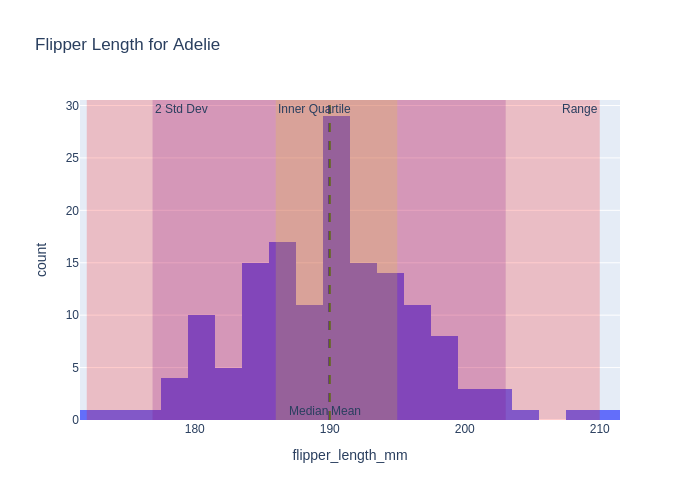

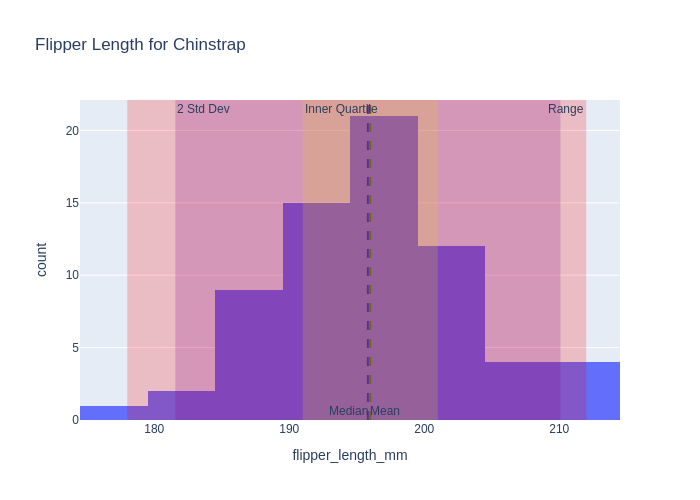

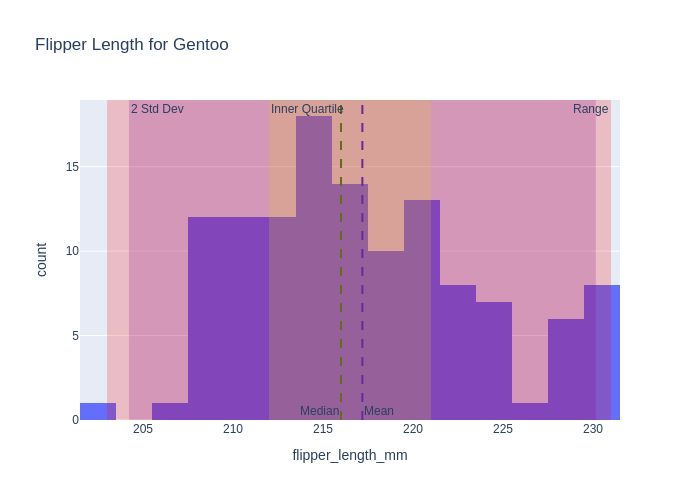

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset from an alternative source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Function to add lines and rectangles to the histogram
def add_lines_and_rectangles(fig, species_df, species_name):
    mean = species_df['flipper_length_mm'].mean()
    median = species_df['flipper_length_mm'].median()
    min_val = species_df['flipper_length_mm'].min()
    max_val = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_dev = species_df['flipper_length_mm'].std()

    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), name='Mean', annotation_text='Mean', annotation_position='bottom right')
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), name='Median', annotation_text='Median', annotation_position='bottom left')

    # Add range rectangle
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor='red', opacity=0.2, line_width=0, annotation_text='Range', annotation_position='top right')

    # Add interquartile range rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor='yellow', opacity=0.2, line_width=0, annotation_text='Inner Quartile', annotation_position='top left')

    # Add 2 standard deviations rectangle
    fig.add_vrect(x0=mean-2*std_dev, x1=mean+2*std_dev, fillcolor='purple', opacity=0.2, line_width=0, annotation_text='2 Std Dev', annotation_position='top left')

# Create histograms for each species
for species in df['species'].unique():
    species_df = df[df['species'] == species]
    
    fig = px.histogram(species_df, x='flipper_length_mm', title=f'Flipper Length for {species}')
    
    add_lines_and_rectangles(fig, species_df, species)
    
    # Update layout to include legend
    fig.update_layout(
        legend=dict(
            title="Annotations",
            itemsizing='constant'
        )
    )
    
    fig.show(renderer="png")


TypeError: show() got an unexpected keyword argument 'renderer'

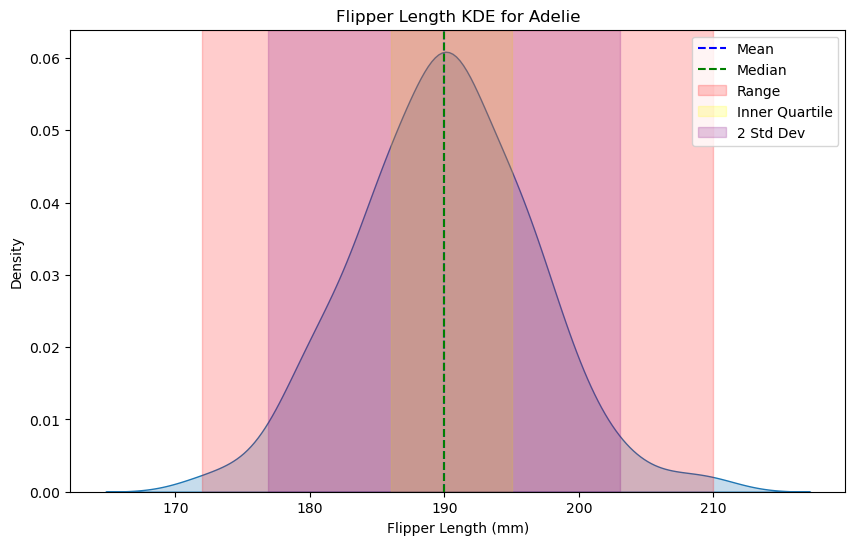

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from an alternative source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Function to add lines and rectangles to the KDE plot
def add_lines_and_rectangles(ax, species_df):
    mean = species_df['flipper_length_mm'].mean()
    median = species_df['flipper_length_mm'].median()
    min_val = species_df['flipper_length_mm'].min()
    max_val = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_dev = species_df['flipper_length_mm'].std()

    # Add mean and median lines
    ax.axvline(mean, color='blue', linestyle='--', label='Mean')
    ax.axvline(median, color='green', linestyle='--', label='Median')

    # Add range rectangle
    ax.axvspan(min_val, max_val, color='red', alpha=0.2, label='Range')

    # Add interquartile range rectangle
    ax.axvspan(q1, q3, color='yellow', alpha=0.2, label='Inner Quartile')

    # Add 2 standard deviations rectangle
    ax.axvspan(mean-2*std_dev, mean+2*std_dev, color='purple', alpha=0.2, label='2 Std Dev')


# Create KDE plots for each species
for species in df['species'].unique():
    species_df = df[df['species'] == species]
    
    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(species_df['flipper_length_mm'], fill=True)
    add_lines_and_rectangles(ax, species_df)
    
    plt.title(f'Flipper Length KDE for {species}')
    plt.legend()
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    plt.show()

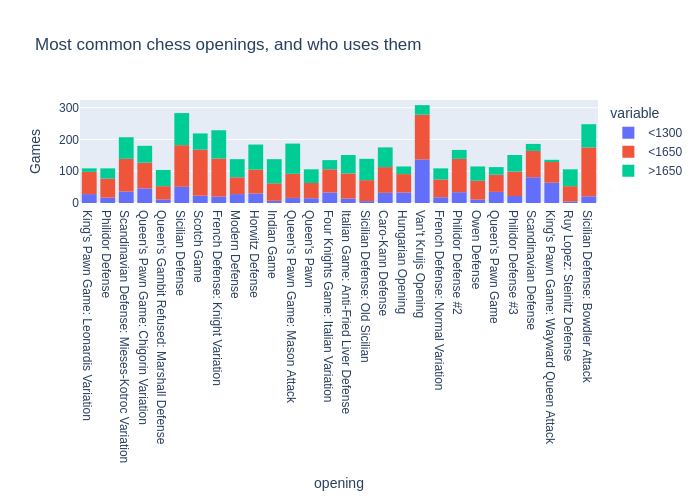

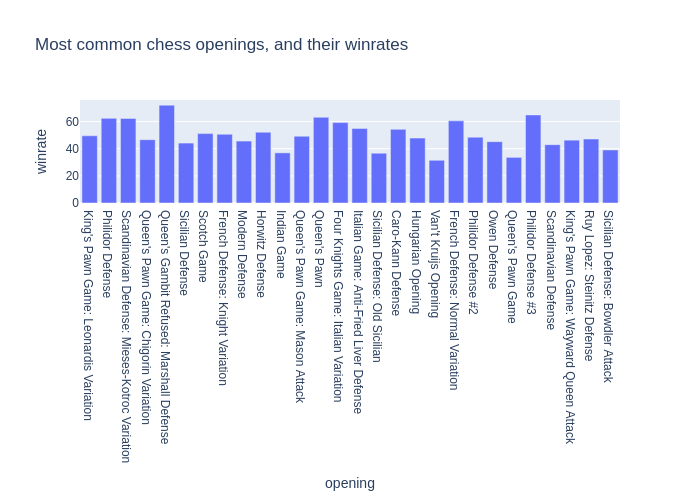

In [51]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-10-01/chess.csv')
df = df[df['rated']==True]

data = {'opening' : [], 
        'winrate' : [],
        '<1300' : [],
        '<1650' : [],
        '>1650' : [],
        'games' : []}

for opening in df['opening_name'].unique():
    opening_df = df[df['opening_name'] == opening]
    games = len(opening_df)
    if games < 100:
        continue
    wins = len(opening_df[opening_df['winner'] == 'white'])
    
    bottom = len(opening_df[opening_df['white_rating'] < 1300])
    top = len(opening_df[opening_df['white_rating'] > 1650])
    data['<1300'].append(bottom)
    data['>1650'].append(top)
    data['<1650'].append(games-top-bottom)
        
    data['opening'].append(opening)
    data['winrate'].append(round(wins/games*100,2))
    data['games'].append(games)


res = pd.DataFrame(data)
fig = px.histogram(res, x='opening', y=['<1300','<1650','>1650'], title='Most common chess openings, and who uses them')
fig.update_layout(yaxis_title="Games")
fig.show(renderer="png")

fig = px.bar(res, x='opening', y='winrate', title='Most common chess openings, and their winrates')
fig.show(renderer="png")

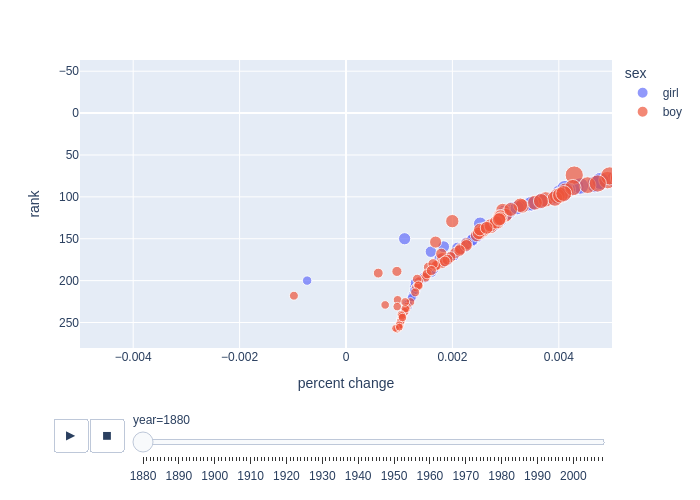

In [48]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS